# Import 

In [1]:
from utils.plot_regret import plot_regret 
from utils.Experiment import experiment
from Agents.RB_agent import RegretBalancingAgent
from environments.BernoulliBanditEnv import BernoulliBanditEnv
import matplotlib.pyplot as plt
import numpy as np
from Agents.EpsilonGreedy import EpsilonGreedy

# $\varepsilon$-greedy

In [2]:
np.random.seed(1)

## Fixed $\varepsilon$

In [37]:
#Arms definition and Bernoulli environment
n_arms = 3
means = [0.2, 0.5, 0.75]
env = BernoulliBanditEnv(means = means)

In [4]:
#Initialization of eps-algo, with fixed epsilon
eps0 = EpsilonGreedy(K=len(means), eps = 0.1, FixedEpsilon = True, m = 1) 
eps04 = EpsilonGreedy(K=len(means), eps = 0.4, FixedEpsilon = True, m = 1) 
eps07 = EpsilonGreedy(K=len(means), eps = 0.7, FixedEpsilon = True, m = 1) 
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.25, m = 1)

In [5]:
epsAlgo = [eps0, eps04, eps07, epsOpti]

In [6]:
#Run experiments
Nmc = 100  # Number of Monte Carlo simulations
T = 2000  # Number of rounds
all_data = experiment(env, epsAlgo, Nmc, T, bern = True)

In [7]:
# Update rcParams
plt.rcParams.update({
    'axes.titlesize': 16,           # Title size for the axes
    'axes.labelsize': 16,           # Label size for the axes
    'xtick.labelsize': 14,          # Label size for x-axis ticks
    'ytick.labelsize': 14,          # Label size for y-axis ticks
    'legend.fontsize': 14,          # Font size for legend
    'text.usetex': True,            # Use LaTeX for text rendering
    'font.family': 'serif',         # Use serif font (LaTeX default)
})

c:\Users\theom\Desktop\AML\Advanced-ML\src\utils\plot_regret.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  reg_plot.show()


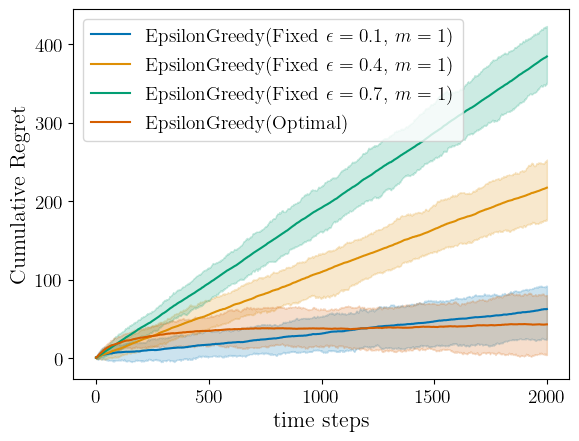

In [8]:
#Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10)

## Time varying $\varepsilon_t$

In [60]:
#Arms definition and Bernoulli environment
n_arms = 2
means = [0.2, 0.75]
env = BernoulliBanditEnv(means = means)

In [61]:
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.55, m = 1)

In [62]:
epsAlgo = [EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=1, m = 1),
           EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=25, m = 1),
           EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=75, m = 1),
           EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=150, m = 1),
           EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=350, m = 1),
           EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=500, m = 1)]

In [63]:
rb_agent = RegretBalancingAgent(learners = epsAlgo, 
                                K = n_arms, 
                                delta = 0.1, 
                                u_bounds = [lambda x : np.sqrt(x * n_arms) for _ in range(len(epsAlgo))],
                                env = env)

In [73]:
#Run experiments
Nmc = 250  # Number of Monte Carlo simulations
T = 2500  # Number of rounds
all_data = experiment(env, epsAlgo, Nmc, T, bern=True)

In [76]:
# Update rcParams
plt.rcParams.update({
    'axes.titlesize': 16,           # Title size for the axes
    'axes.labelsize': 16,           # Label size for the axes
    'xtick.labelsize': 14,          # Label size for x-axis ticks
    'ytick.labelsize': 14,          # Label size for y-axis ticks
    'legend.fontsize': 12,          # Font size for legend
    'text.usetex': True,            # Use LaTeX for text rendering
    'font.family': 'serif',         # Use serif font (LaTeX default)
})

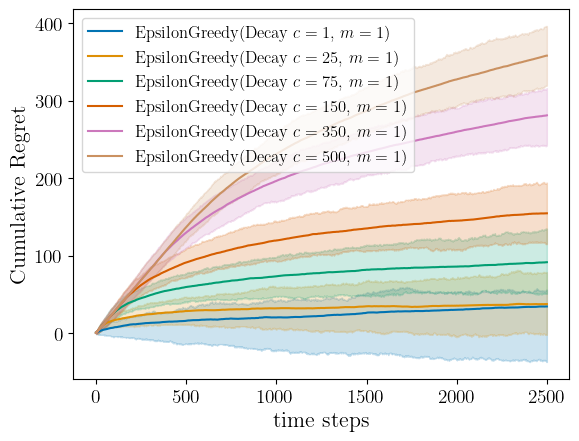

In [77]:
#Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf='baseEpsLearner.pdf')

In [78]:
all_data = experiment(env, [EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=500, m = 1), epsOpti, rb_agent], Nmc, T, bern=True)

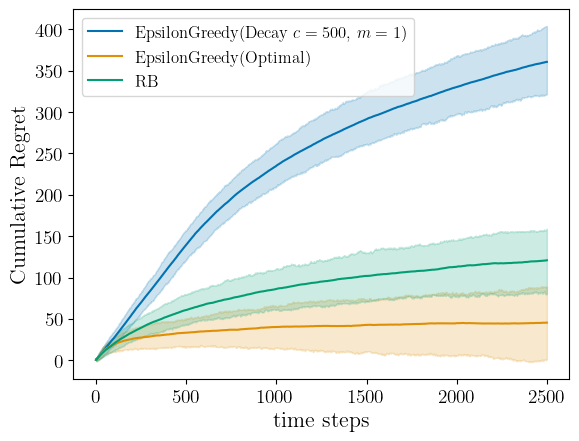

In [80]:
#Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf='rbEps.pdf')